In [23]:
from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [24]:
import os

dir_path = '/content/drive/My Drive/Colab Notebooks'

files = os.listdir(dir_path)

for file in files:
    print(file)


predictStocks.ipynb
L01-python-nltk-spacy.ipynb
CV_项目1.ipynb
CIFAR10-CLS_19300686015.ipynb
Copy of 分类_CIFAR-10.ipynb
fashion_mnist_test.npy
fashion_mnist_train.npy
CV2_HW2.ipynb
分类_CIFAR-10.ipynb
CV2_HW.ipynb


In [25]:
import numpy as np

with open('/content/drive/My Drive/Colab Notebooks/fashion_mnist_train.npy', 'rb') as train_data:
    X_train = np.load(train_data)
    y_train = np.load(train_data)

with open('/content/drive/My Drive/Colab Notebooks/fashion_mnist_test.npy', 'rb') as test_data:
    X_test = np.load(test_data)
    y_test = np.load(test_data)

In [26]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [27]:
X_train = X_train[:5000]
y_train = y_test[:5000]

X_test = X_test[:5000]
y_test = y_test[:5000]

In [28]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(5000, 28, 28)
(5000, 28, 28)
(5000,)
(5000,)


In [29]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

In [30]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(5000, 784)
(5000, 784)
(5000,)
(5000,)


In [31]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [51]:
import pickle

class NN:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate, epochs):

        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.epochs = epochs

        self.wih = np.random.normal(0.0, pow(self.input_neurons, -0.5), (self.hidden_neurons, self.input_neurons))
        self.bih = 0

        self.who = np.random.normal(0.0, pow(self.hidden_neurons, -0.5), (self.output_neurons, self.hidden_neurons))
        self.bho = 0

        self.lr = learning_rate

    def activation(self, z):
        """Returns the sigmoid of z"""
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        """Returns the derivative of the sigmoid of z"""
        return self.activation(z) * (1 - self.activation(z))

    def forward(self, input_list):
        inputs = np.array(input_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs) + self.bih

        hidden_outputs = self.activation(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs) + self.bho

        yj = self.activation(final_inputs)

        return yj


    def backprop(self, inputs_list, targets_list):

        inputs = np.array(inputs_list, ndmin=2).T

        tj = np.array(targets_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs) + self.bih

        hidden_outputs = self.activation(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs) + self.bho

        yj = self.activation(final_inputs)

        output_errors = -(tj - yj)

        hidden_errors = np.dot(self.who.T, output_errors)

        self.who -= self.lr * np.dot((output_errors * self.sigmoid_derivative(yj)), np.transpose(hidden_outputs))
        self.wih -= self.lr * np.dot((hidden_errors * self.sigmoid_derivative(hidden_outputs)), np.transpose(inputs))

        self.bho -= self.lr * (output_errors * self.sigmoid_derivative(yj))
        self.bih -= self.lr * (hidden_errors * self.sigmoid_derivative(hidden_outputs))
        pass

    def fit(self, inputs_list, targets_list):
        for epoch in range(self.epochs):
            self.backprop(inputs_list, targets_list)
            print(f"Epoch {epoch}/{self.epochs} completed.")

    def predict(self, X):
        outputs = self.forward(X).T
        return outputs

    def save_model(self, filename):
      model_params = {
          'wih': self.wih,
          'bih': self.bih,
          'who': self.who,
          'bho': self.bho
      }
      with open(filename, 'wb') as f:
          pickle.dump(model_params, f)

In [53]:
nn = NN(input_neurons=784, hidden_neurons=128, output_neurons=10, learning_rate=0.01, epochs=1000)

nn.fit(X_train, y_train)

nn.save_model('model_nn.pkl')

Epoch 0/1000 completed.
Epoch 1/1000 completed.
Epoch 2/1000 completed.
Epoch 3/1000 completed.
Epoch 4/1000 completed.
Epoch 5/1000 completed.
Epoch 6/1000 completed.
Epoch 7/1000 completed.
Epoch 8/1000 completed.
Epoch 9/1000 completed.
Epoch 10/1000 completed.
Epoch 11/1000 completed.
Epoch 12/1000 completed.
Epoch 13/1000 completed.
Epoch 14/1000 completed.
Epoch 15/1000 completed.
Epoch 16/1000 completed.
Epoch 17/1000 completed.
Epoch 18/1000 completed.
Epoch 19/1000 completed.
Epoch 20/1000 completed.
Epoch 21/1000 completed.
Epoch 22/1000 completed.
Epoch 23/1000 completed.
Epoch 24/1000 completed.
Epoch 25/1000 completed.
Epoch 26/1000 completed.
Epoch 27/1000 completed.
Epoch 28/1000 completed.
Epoch 29/1000 completed.
Epoch 30/1000 completed.
Epoch 31/1000 completed.
Epoch 32/1000 completed.
Epoch 33/1000 completed.
Epoch 34/1000 completed.
Epoch 35/1000 completed.
Epoch 36/1000 completed.
Epoch 37/1000 completed.
Epoch 38/1000 completed.
Epoch 39/1000 completed.
Epoch 40/1

In [34]:
probs = nn.predict(X_test)

predictions = []

for prob in probs:
    max_idx = np.argmax(prob)
    prediction = np.zeros_like(prob)
    prediction[max_idx] = 1
    predictions.append(prediction)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print("Accuracy:",accuracy_score(predictions, y_test))
print("CR:", classification_report(predictions, y_test))

Accuracy: 0.9478
CR:               precision    recall  f1-score   support

           0       0.92      0.89      0.90       521
           1       0.91      1.00      0.95       438
           2       0.94      1.00      0.97       490
           3       0.99      0.98      0.99       506
           4       0.99      0.82      0.89       633
           5       0.92      1.00      0.96       447
           6       0.91      1.00      0.96       441
           7       0.96      0.96      0.96       499
           8       0.95      0.90      0.92       555
           9       0.99      1.00      0.99       470

   micro avg       0.95      0.95      0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000
 samples avg       0.95      0.95      0.95      5000



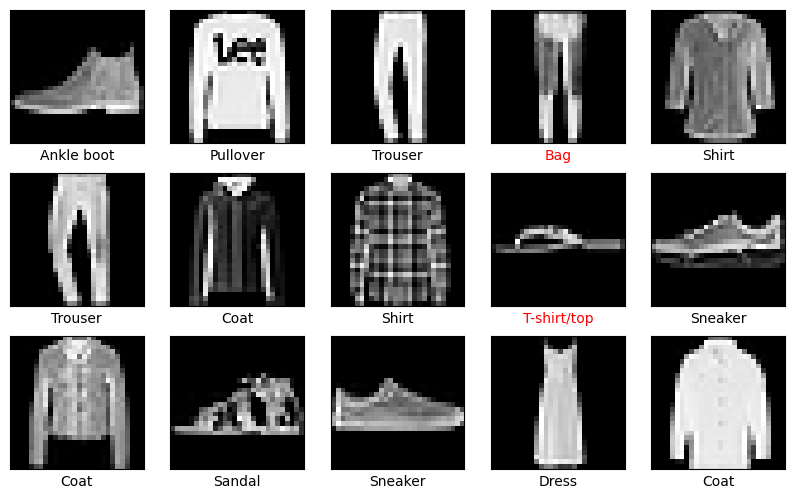

In [42]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    img_data = X_test[i].reshape((28, 28))

    ax.imshow(img_data, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    index = np.where(predictions[i] == 1)[0][0]
    label = class_names[index]
    true_label = class_names[np.argmax(y_test[i])]
    if label != true_label:
        ax.set_xlabel(label, color='r')
    else:
        ax.set_xlabel(label)
plt.show()


In [59]:
from google.colab import files
files.download('/content/model_nn.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
import os

print("Current directory:", os.getcwd())

print("Contents of the current directory:", os.listdir())


Current directory: /content
Contents of the current directory: ['.config', 'drive', 'model_nn.pkl', 'sample_data']
